***Kernel Initializer 'he_uniform' works best with ReLu<br>
Kernel Initializer 'glorot_uniform' works best with Sigmoid***

In [1]:
# Customer churn means that a person leaving the current business. For example, if a person is currently using 
# BSNL lan, he changes his internet connection to some other company. This may be due to several reaasons.
# You may also consider banks, where customers closes the account and go with another one. Here, banks may want to know
# the reason behind the customer leaving the current service.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# tenure means the number of years/months the person is with the service.
# churn Yes ==> Customers are leaving the service and vice versa.

In [5]:
# You may see that customer id is not necessary.

In [6]:
df.drop(columns='customerID',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Lets have a look at the datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
# You see that total charges is of object datatype and not float

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
# The dtype of it is string, so we need to convert it into float
# df['TotalCharges'].apply(lambda x: float(x)) this is not working indicating that there are some other values other than float
# Another way to convert string to float is to_numeric method
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [11]:
# There is an error at pos 488.
(df['TotalCharges'])[488]

' '

In [12]:
# You can see that the field is empty. Lets replace the missing values with Nan. You can do this by initializing the
# error paramter of the pd.to_numeric() method to coerce
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# You can see that TotalCharges is converted into float and the missing values are replaced with Nan

In [15]:
df.TotalCharges.isnull().sum()

11

In [16]:
df.shape

(7043, 20)

In [17]:
# We are dropping the null TotalCharges rows because these are only eleven and we are dealing with a dataset that is much
# larger (7043 rows).
df2=df[~(df.TotalCharges.isnull())]

In [18]:
df2.shape

(7032, 20)

In [19]:
# Now we have a dataset with no null total charges rows.

In [20]:
# Lets have a look on number of customers leaving the service (churn=yes) vs customers with churn=no tenure (loyality)

In [21]:
churn_yes=df2[df2.Churn=='Yes'].tenure
churn_no=df2[df2.Churn=='No'].tenure

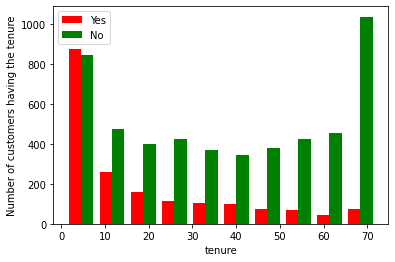

In [22]:
plt.hist([churn_yes,churn_no],color=['red','green'],label=['Yes', 'No'])
plt.xlabel("tenure")
plt.ylabel("Number of customers having the tenure")
plt.legend()

In [23]:
# You can see that if the customers tenure is high there are very rare chances that he might leave the service.

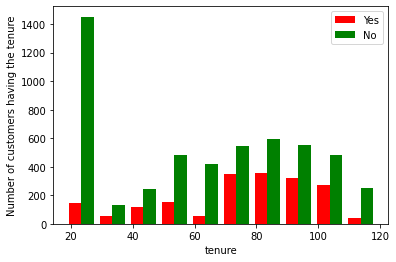

In [24]:
# Lets analyze the same thing with monthly charges
churn_yes_monthly_charges=df2[df2.Churn=='Yes'].MonthlyCharges
churn_no_monthly_charges=df2[df2.Churn=='No'].MonthlyCharges
plt.hist([churn_yes_monthly_charges,churn_no_monthly_charges],color=['red','green'],label=['Yes', 'No'])
plt.xlabel("tenure")
plt.ylabel("Number of customers having the tenure")
plt.legend()

In [25]:
# We can run a for loop for all the columns like the one below
for column in df2:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [26]:
# Lets find all the unique values in the dataframe and make it a function.
def unique_col_values(data):
    for col in data:
            print(f"{col}: {data[col].unique()}")

In [27]:
unique_col_values(df2)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [28]:
# You can see that having no phone service or no internet service means the same as no. So we will replace all these with no

In [29]:
df2.MultipleLines.replace(to_replace='No phone service',value='No',inplace=True)
df2.OnlineSecurity.replace(to_replace='No internet service',value='No',inplace=True)
df2.DeviceProtection.replace(to_replace='No internet service',value='No',inplace=True)
df2.TechSupport.replace(to_replace='No internet service',value='No',inplace=True)
df2.StreamingTV.replace(to_replace='No internet service',value='No',inplace=True)
df2.StreamingMovies.replace(to_replace='No internet service',value='No',inplace=True)

C:\Users\91830\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [30]:
unique_col_values(df2)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [31]:
df2.OnlineBackup.replace(to_replace='No internet service',value='No',inplace=True)

In [32]:
unique_col_values(df2)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [33]:
# Lets change all the yes and no values with 1 and 0

In [34]:
# We are not directly replacing all the columns using the replace because internet service column also has no.
columns_yes_no=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in columns_yes_no:
    df2[col].replace({'Yes':1,'No':0},inplace=True)

In [35]:
# While running for the second time the above cell, it raised an error because now there are no 'Yes' and 'No'.
unique_col_values(df2)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [36]:
df2.gender.replace({'Male':1,'Female':0},inplace=True)
unique_col_values(df2)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [37]:
# We have not used One-hot-encoding till now since we were dealing with categorical columns having two unique values.
# Columns like Internet service, contract etc., have more than two unique categorical features and hence we will one-hot 
# encode these columns.

In [38]:
df3=pd.get_dummies(df2,drop_first=True)

In [39]:
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [40]:
df3.shape

(7032, 24)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [42]:
# Now all datatypes are numbers.

In [43]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [44]:
# Now we need to scale our data.

In [45]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [46]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [47]:
import seaborn as sns

In [48]:
df3['tenure'].skew()

0.23773083190513133

In [49]:
# log transformation to remove skewness
(np.log(df3['tenure'])).skew()

-0.960180204906086

In [50]:
# sqrt transformation to remove skewness
(np.sqrt(df3['tenure'])).skew()

-0.23419748987386282

In [51]:
# box-cox transformation to remove skewness
from scipy import stats

In [52]:
tenure_boxcox=stats.boxcox(df3['tenure'])[0]
tenure_boxcox=pd.Series(tenure_boxcox)
tenure_boxcox.skew()

-0.28585923548525016

If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric.
Hence, in this case there is no need to skew the data.

In [53]:
df3['MonthlyCharges'].skew()

-0.22210292770166232

In [54]:
df3['TotalCharges'].skew()

0.9616424997242504

In [55]:
# Since its value does not lie between 0 and 1, we must try to reduce its skewness

In [56]:
# log transformation to remove skewness
(np.log(df3['TotalCharges'])).skew()

-0.7535741253284722

In [57]:
# sqrt transformation to remove skewness
(np.sqrt(df3['TotalCharges'])).skew()

0.3089261418986736

In [58]:
TotalCharges_boxcox=stats.boxcox(df3['TotalCharges'])[0]
TotalCharges_boxcox=pd.Series(TotalCharges_boxcox)
TotalCharges_boxcox.skew()

-0.14575786874026936

In [59]:
TotalCharges_boxcox

0        5.399287
1       22.900956
2        9.018523
3       22.722905
4       10.182711
          ...    
7027    23.259217
7028    34.010528
7029    13.487726
7030    12.953998
7031    33.311446
Length: 7032, dtype: float64

C:\Users\91830\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

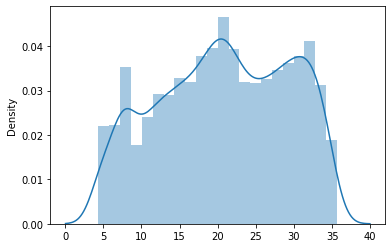

In [60]:
# You can see that boxcox transformation is giving us the best result.
sns.distplot(TotalCharges_boxcox)

C:\Users\91830\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

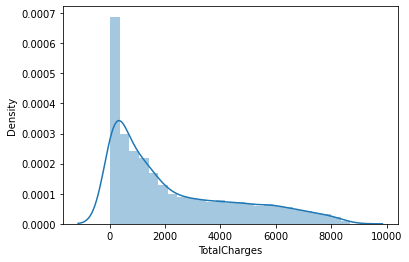

In [61]:
sns.distplot(df3.TotalCharges)

In [62]:
df3['TotalCharges']=np.array(TotalCharges_boxcox)

In [63]:
df3.shape

(7032, 24)

In [64]:
df3.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [65]:
# Lets scale the data

In [66]:
scale=MinMaxScaler()
df3[cols_to_scale]=scale.fit_transform(df3[cols_to_scale])

In [67]:
unique_col_values(df3)

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

C:\Users\91830\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

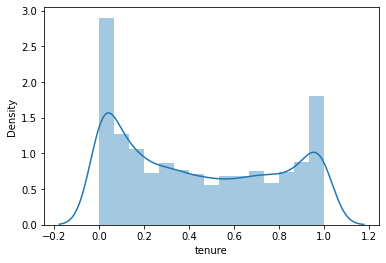

In [68]:
sns.distplot(df3.tenure)

C:\Users\91830\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

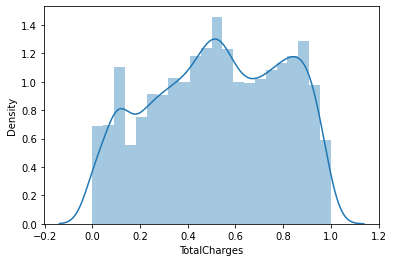

In [69]:
sns.distplot(df3.TotalCharges)

In [70]:
# Lets divide the data into independent and dependent variables.
X=df3.drop(columns='Churn')
y=df3['Churn']

In [71]:
# Now we will use train_test_split method to split our data into training and testing samples.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [72]:
# Lets create a neural network. Since we are performing Binary classification, we require single neuron in the output layer.
# If you were performing multi classification, we would have required 'n' number of neurons where 'n' is the number of
# possible outputs.

In [73]:
X_train.shape

(5625, 23)

In [74]:
import tensorflow as tf
from tensorflow import keras

In [75]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(23,),kernel_initializer='he_uniform',activation='relu'), #Input layer
    # Kernel Initializer 'he_uniform' works best with ReLu
    keras.layers.Dense(15,kernel_initializer='he_uniform',activation='relu'), # hidden layer
    keras.layers.Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'), # output layer 
    # Kernel Initializer 'glorot_uniform' works best with Sigmoid
    # General rule is to use relu in the hidden layers and sigmoid in the output layer (if classification problem).
])
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# We are using binary_crossentropy beacuse we are dealing with binary classification problem.
# crossentropy is used for classification problems.
# We generally use 'adam' as an optimizer.
# While fitting the model, always try with less epochs (say 5), if you see that
# your parameters are working, then go with larger epochs (say 100)
model.fit(X_train,y_train,epochs=100)

Train on 5625 samples
Epoch 1/100
5625/5625 [==============================] - 3s 452us/sample - loss: 0.5122 - accuracy: 0.7532
Epoch 2/100
5625/5625 [==============================] - 1s 192us/sample - loss: 0.4495 - accuracy: 0.7881
Epoch 3/100
5625/5625 [==============================] - 1s 197us/sample - loss: 0.4352 - accuracy: 0.7932
Epoch 4/100
5625/5625 [==============================] - 1s 194us/sample - loss: 0.4269 - accuracy: 0.7988
Epoch 5/100
5625/5625 [==============================] - 1s 210us/sample - loss: 0.4223 - accuracy: 0.8011
Epoch 6/100
5625/5625 [==============================] - 2s 312us/sample - loss: 0.4190 - accuracy: 0.8048
Epoch 7/100
5625/5625 [==============================] - 2s 291us/sample - loss: 0.4148 - accuracy: 0.8048
Epoch 8/100
5625/5625 [==============================] - 2s 295us/sample - loss: 0.4127 - accuracy: 0.8078
Epoch 9/100
5625/5625 [==============================] - 2s 350us/sample - loss: 0.4105 - accuracy: 0.8062
Epoch 10/100
56

5625/5625 [==============================] - 1s 266us/sample - loss: 0.3693 - accuracy: 0.8288
Epoch 76/100
5625/5625 [==============================] - 1s 234us/sample - loss: 0.3693 - accuracy: 0.8288
Epoch 77/100
5625/5625 [==============================] - 1s 197us/sample - loss: 0.3691 - accuracy: 0.8252
Epoch 78/100
5625/5625 [==============================] - 1s 187us/sample - loss: 0.3683 - accuracy: 0.8261
Epoch 79/100
5625/5625 [==============================] - 1s 189us/sample - loss: 0.3672 - accuracy: 0.8277
Epoch 80/100
5625/5625 [==============================] - 1s 198us/sample - loss: 0.3682 - accuracy: 0.8279
Epoch 81/100
5625/5625 [==============================] - 1s 259us/sample - loss: 0.3676 - accuracy: 0.8247
Epoch 82/100
5625/5625 [==============================] - 2s 294us/sample - loss: 0.3669 - accuracy: 0.8299
Epoch 83/100
5625/5625 [==============================] - 1s 261us/sample - loss: 0.3661 - accuracy: 0.8276
Epoch 84/100
5625/5625 [=================

***Note:***<br>
While training the model, the weights and the bias gets stored and hence, if you want to reset these values, you need to run the cell that contains the neural network i.e., keras.Sequential()

In [76]:
model.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 167us/sample - loss: 0.4536 - accuracy: 0.7882


[0.4535960454252822, 0.78820187]

In [77]:
# You can see that our model performance is 80% accurate.

In [78]:
y_pred=model.predict(X_test)

In [79]:
y_pred

array([[0.8946343 ],
       [0.2588675 ],
       [0.3802338 ],
       ...,
       [0.09877717],
       [0.48846996],
       [0.8589188 ]], dtype=float32)

In [80]:
# Since the values lie between 0 and 1, we must convert the values less than 0.5 as 0 and greater than 0.5 as 1

In [81]:
y_final=[]
for i in range(len(y_pred)):
    # print(y_pred[i][0])
    if (y_pred[i][0]<0.5):
        y_final.append(0)
    else:
        y_final.append(1)

In [82]:
y_final

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


In [83]:
y_final[:5] # First 5 values

[1, 0, 0, 0, 0]

In [84]:
# Lets print a classification report
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, y_final))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1037
           1       0.62      0.49      0.55       370

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(24.0, 0.5, 'True')

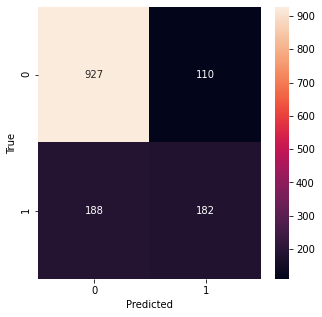

In [86]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_final)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d') # fmt='d' converts the values like 1e into 100
plt.xlabel('Predicted')
plt.ylabel('True')

***Difference between Accuracy, Precision and Recall:***<br>
Consider an example where you are attempting your JEE Mains paper. Out of 90 questions, you know that you can answer only 10 questions right. In this case, you have high accuracy because you know that you will get 40 marks but do you think this is enough? This is a low score though you were accurate. This happened due to low precision. Now consider the case where you know that 80 out of 90 questions are correct and hence your accuracy and precision both are high in this case. Now consider that you have attempted 70 out 90 questions where you got to know that out 70 questions, 50 were right and hence your score was 180. In this case, your score is high but since you also have many negatives, your precision was low, though your accuracy was high because you have solved the questions right almost 50% of the times.<br>
Recall: Recall is simply the total number of correct guesses made by you out of all the correct values.

In [87]:
# You can see imbalance in the data because the true '0' values are nearly 1000 and true '1' values are nearly 350.
# This is one of the issues faced when a dataset is given. High precision+high recall also leads to imbalance of dataset.

[Handling Mising Values](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)